# L13a: Long Short-Term Memory (LSTM) Recurrent Neural Networks
In this lecture, we'll discuss the Long Short Term Memory (LSTM) architecture, a Recurrent Neural Network (RNN) type designed to learn long-term dependencies in sequential data. LSTMs are particularly effective for language modeling, machine translation, and time series modeling tasks. The key ideas discussed in this lecture are:

* __LSTM Architecture__: LSTMs are recurrent neural networks with additional logic (and memory) that modifies the hidden state. The LSTM architecture consists of three main gates: the input gate, the forget gate, and the output gate. These gates control the flow of information into and out of the cell state, which influences the hidden state of the LSTM. The cell state is a memory that can store information over long periods, allowing the LSTM to learn long-term dependencies in the data.
* __LSTM Gates__: The _input gate_ determines how much of the new information should be added to the cell state, the _forget gate_ decides how much of the previous cell state should be discarded, and the _output gate_ controls how much of the cell state should be exposed to the next layer. The gates use [sigmoid activation functions](https://en.wikipedia.org/wiki/Sigmoid_function) to produce values between 0 and 1 multiplied by the corresponding inputs or states.
* __LSTM Training__: LSTMs are trained [using backpropagation through time (BPTT)](https://d2l.ai/chapter_recurrent-neural-networks/bptt.html), which is an extension of the standard backpropagation algorithm for training feedforward neural networks. BPTT involves _unrolling_ (looking at time slices) the LSTM over time and computing gradients for each time step, allowing the model to learn from both short-term and long-term dependencies in the data.

The material in this lecture is based on the following references:

* [Chapter 10, Goodfellow et al., Deep Learning Book, 2017 MIT Press](http://www.deeplearningbook.org/)
* [Sepp Hochreiter and Jürgen Schmidhuber. 1997. Long Short-Term Memory. Neural Comput. volume 9, issue 8, 1735–1780. https://doi.org/10.1162/neco.1997.9.8.1735](https://dl.acm.org/doi/10.1162/neco.1997.9.8.1735)

___

## Motivation: Why LSTMs?
LSTMs were developed to address the limitations of traditional RNNs, which struggle to learn long-term dependencies due to the vanishing/exploding gradient problem. LSTMs mitigate this issue by introducing a _cell state_ that can retain information over long periods, along with gating mechanisms that control the flow of information into the hidden state. However, do LSTMs consistently outperform traditional RNNs? The answer is no. Traditional RNNs can sometimes be more efficient and effective, especially for tasks with shorter sequences or less complex dependencies.

### Advantages of LSTMs:

* __Better at Capturing Long-Term Dependencies__: LSTMs are designed to retain information over longer time steps due to their gating mechanisms (input, forget, and output gates), which allow them to store or discard information selectively. This makes them superior to traditional RNNs, which struggle with long-term dependencies.
* __Mitigation of Vanishing/Exploding Gradient Problem__: The architecture of LSTMs helps prevent the vanishing/exploding gradient issue that plagues traditional RNNs. This ensures more stable and effective training over long sequences.
* __Selective Memory Retention__: LSTMs can decide what information to keep or forget using their gating mechanisms, making them more efficient at handling complex sequential data than RNNs, which (traditionally) lack such mechanisms.

### Disadvantages of LSTMs:
* __Higher Computational Complexity__: The additional gates and memory cells in LSTMs make them computationally more expensive and slower to train compared to simpler RNNs such as [an Elman network](https://en.wikipedia.org/wiki/Recurrent_neural_network#Elman_networks_and_Jordan_networks).
* __Overfitting__: Due to their large number of parameters, LSTMs are prone to overfitting, especially when the training dataset is small or lacks diversity. 
* __Longer Training Time__: LSTMs often require significantly more time to train than traditional RNNs, which can be a drawback for tasks where speed is critical.

## LSTM Architecture
LSTMs are designed to maintain a _cell state_ (another type of internal memory) that can carry information across many time steps, effectively allowing them to learn long-term dependencies. The cell state is updated using _gates_, which control the flow of information into and out of the cell state. The LSTM architecture consists of three main components: the input gate, the forget gate, and the output gate.

### LSTM Gates
The big difference between a vanilla RNN and an LSTM is the cell state $c_{t}$, a memory that can carry information across many time steps. The cell state is updated using the input gate and the forget gate, which controls how much of the previous cell state should be retained and how much new information should be added. The output gate determines how much of the cell state should be exposed to the next layer.

* __Forget gate__: The forget gate $f_t$ determines how much of the previous cell state $c_{t-1}$ should be retained. It is computed using a sigmoid activation function, which outputs values between 0 and 1. A value of 0 means "forget everything," while a value of 1 means "keep everything."
* __Input gate__: In an LSTM, the input gate $i_t$ determines how much new information from the current input and the previous hidden state should be added to the cell state. It is also computed using a sigmoid activation function, which outputs values between 0 and 1. A value of 0 means "don't add anything," while a 1 means "add everything."
* __Output gate__: The output gate $o_t$ determines how much of the cell state should be exposed to the next layer. It is computed using a sigmoid activation function, which outputs values between 0 and 1. A value of 0 means "don't expose anything," while a value of 1 means "expose everything."

### Model
The compact form for the LSTM equations (at time $t$) with a forget gate is given by:
$$
\begin{align*}
f_t &= \sigma(W_f x_t + U_f h_{t-1} + b_f) \\
i_t &= \sigma(W_i x_t + U_i h_{t-1} + b_i) \\
o_t &= \sigma(W_o x_t + U_o h_{t-1} + b_o) \\
\tilde{c}_t &= \texttt{tanh}(W_c x_t + U_c h_{t-1} + b_c) \\
c_t &= f_t \odot c_{t-1} + i_t \odot \tilde{c}_t \\
h_t &= o_t \odot \texttt{tanh}(c_t)
\end{align*}
$$
where $\odot$ denotes the element-wise product ([Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))) and $\sigma$ is the $\texttt{sigmoid}$ activation function. Let the superscripts $d$ and $h$ denote the input and hidden state dimensions, respectively. The following _variables_ are used in the LSTM architecture:
* $x_t \in \mathbb{R}^{d}$: Input vector at time step $t$.
* $h_t \in (-1,1)^h$: Hidden state vector at time step $t$.
* $f_t \in (0,1)^{h}$: Forget gate vector at time step $t$.
* $i_t \in (0,1)^{h}$: Input gate vector at time step $t$.
* $o_t \in (0,1)^{h}$: Output gate vector at time step $t$.
* $c_t \in \mathbb{R}^{h}$: Cell state vector at time step $t$.
* $\tilde{c}_t \in (-1,1)^{h}$: Candidate cell state vector at time step $t$.

An LSTM has the following parameters:
* $W_f \in \mathbb{R}^{h \times d}$: Weights for the forget gate with respect to the input.
* $W_i \in \mathbb{R}^{h \times d}$: Weights for the input gate with respect to the input.
* $W_o \in \mathbb{R}^{h \times d}$: Weights for the output gate with respect to the input.
* $W_c \in \mathbb{R}^{h \times d}$: Weights for the candidate cell state with respect to the input.
* $U_f \in \mathbb{R}^{h \times h}$: Weights for the forget gate with respect to the hidden state.
* $U_i \in \mathbb{R}^{h \times h}$: Weights for the input gate with respect to the hidden state.
* $U_o \in \mathbb{R}^{h \times h}$: Weights for the output gate with respect to the hidden state.
* $U_c \in \mathbb{R}^{h \times h}$: Weights for the candidate cell state with respect to the hidden state.
* $b_f \in \mathbb{R}^{h}$: Bias for the forget gate.
* $b_i \in \mathbb{R}^{h}$: Bias for the input gate.
* $b_o \in \mathbb{R}^{h}$: Bias for the output gate.
* $b_c \in \mathbb{R}^{h}$: Bias for the candidate cell state.

## Financial LSTM example (with training)
Let's build a model of the daily growth time series for individual stocks or ETFs using LSTMs. We set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem.

In [5]:
include("Include.jl");

### Constants
Let's set up some constants that we will use in the exercise. Check the comment next to the value for a description of its meaning, permissible values, etc.

In [230]:
number_of_batches = 4; # number of batches
number_of_inputs = 252; # dimension of the input
number_of_outputs = 252; # dimension of the output
number_of_training_examples = number_of_batches*number_of_inputs; # set the *total*  number of training examples
number_of_hidden_states = 2^14; # number of hidden layers
σ₂ = NNlib.tanh_fast; # activation function
number_of_epochs = 100; # TODO: update how many epochs we want to train for

### Data
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2014` until `02-07-2025`, along with data for a few exchange-traded funds and volatility products during that time. We load the `orignal_dataset` by calling the `MyMarketDataSet()` function:

In [232]:
original_dataset = MyMarketDataSet() |> x-> x["dataset"];

__Clean the data__: Not all tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquisition or de-listing events. Let's collect only those tickers with the maximum number of trading days.

* First, let's compute the number of records for a company that we know has a maximum value, e.g., `AAPL`, and save that value in the `maximum_number_trading_days` variable:

In [234]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, lets iterate through our data and collect only those tickers that have `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [236]:
dataset = let

    dataset = Dict{String,DataFrame}();
    for (ticker,data) ∈ original_dataset
        if (nrow(data) == maximum_number_trading_days)
            dataset[ticker] = data;
        end
    end
    dataset
end;

Let's get a list of firms in the cleaned up `dataset` and save it in the `all_tickers` array. We sort the firms alphabetically from `A` to `Z`:

In [238]:
list_of_all_tickers = keys(dataset) |> collect |> sort;

For later, let's grab a few tickers to explore.

In [240]:
index_signal = findfirst(x->x=="SPY", list_of_all_tickers); # this will be our input data
index_target = findfirst(x->x=="SPY", list_of_all_tickers); # this will be what we are trying to predict

Compute the expected (annualized) excess log growth rate by passing the `dataset` and the entire list of firms we have in the dataset to the [log_growth_matrix(...) method](src/Compute.jl). The log growth rate between time period $j-1$ to $j$, e.g., yesterday to today is defined as:
$$
\begin{equation}
\mu_{j,j-1} = \left(\frac{1}{\Delta{t}}\right)\ln\left(\frac{S_{j}}{S_{j-1}}\right) - r_{f}
\end{equation}
$$
where $\Delta{t}$ denotes the period time step, and $S_{j}$ denote share price in period $j$, and $r_{f}$ denotes the annualized continuously compounded risk free rate.

* The log excess growth rates are stored in the `D::Array{Float64,2}` variable, a $T-1\times{N}$ array of log return values. Each row of the `D` matrix corresponds to a time value, while each column corresponds to a firm

In [242]:
D = let

    # setup some constants -
    Δt = (1/252); # 1-trading day in units of years
    risk_free_rate = 0.0415; # inferred cc risk-free rate

    # compute
    μ = log_growth_matrix(dataset, list_of_all_tickers, Δt = Δt, 
        risk_free_rate = risk_free_rate);

    # return to caller
    μ
end;

In [243]:
D

2791×424 Matrix{Float64}:
 -0.919054     6.23955    -2.91247    …   -0.796891    0.204394  -1.04677
  2.77476      1.02999     1.35089         2.09682    -0.84429    0.944968
  3.27155      0.814097   -0.036132        0.068377    1.1495    -2.62294
  0.604925    17.2184      1.65065         0.233216    3.1178    -0.409728
  1.77459      2.53811     3.27774         0.580177   -2.2102     4.36159
  0.57233     -4.00534    -0.83428    …   -0.904239   -1.95127   -3.15774
  2.81921     -0.525251    4.80423         1.7242     -1.81835   -1.1311
  2.00521      0.972004    1.86659         1.63447     4.40834   -0.179319
  1.27139      1.63263     0.0657592      -1.54858    -2.17846    1.39634
  1.17866      6.08807     0.891078       -1.57352     2.83634   -1.47776
 -0.479168     4.82859     0.96624    …   -0.362761    9.46677   -3.05023
  1.32131      3.57167    -2.38926         0.669113    4.48073    0.299031
 -4.78054      1.34435    -3.05774        -2.19395    -6.69057    1.36462
  ⋮      

Next, let's [z-score center](https://en.wikipedia.org/wiki/Feature_scaling) the continuous feature data. In [z-score feature scaling](https://en.wikipedia.org/wiki/Feature_scaling), we subtract off the mean of each feature and then divide by the standard deviation, i.e., $x^{\prime} = (x - \mu)/(CI\cdot\sigma)$ where $x$ is the unscaled data, and $x^{\prime}$ is the scaled data, and $\text{CI}$ is a user-adjustable parameter which influences the width of the scaled distribution. Under this scaling regime, $x^{\prime}\leq{0}$ will be values that are less than or equal to the mean value $\mu$, while $x^{\prime}>0$ indicate values that are greater than the mean.

We save the z-score centered excess growth data in the `D̄::Array{Float64,2}` variable:

In [245]:
D̄ = let

    # setup -
    number_of_examples = size(D,1);
    CI = 4.0;

    D̄ = copy(D);
    for j ∈ eachindex(list_of_all_tickers)
        μ = mean(D[:,j]); # compute the mean
        σ = std(D[:,j]); # compute std

        # rescale -
        for k ∈ 1:number_of_examples
            D̄[k,j] = (D[k,j] - μ)/(CI*σ) |> Float32
        end
    end
    
    D̄
end;

Next, (randomly) split that full dataset `D` into `training` and `test` subsets. We do this randomly, where the `number_of_training_examples::Int64` variable specifies the number of training points. The `training::Array{Float64,2}` data will be used to estimate the model parameters, and `test::Array{Float64,2}` will be used for model testing.

In [247]:
training, test = let
    
    number_of_examples = size(D̄,1); # number of rows in the full dataset
    full_index_set = range(1,stop=number_of_examples,step=1) |> collect |> Set;
    
    # build index sets for training and testing
    training_index_set = Set{Int64}();
    for i ∈ 1:number_of_training_examples
        push!(training_index_set,i); # use in order
    end
    test_index_set = setdiff(full_index_set,training_index_set);

    # build the test and train datasets -
    training = D̄[training_index_set |> collect,:] .|> Float32
    test = D̄[test_index_set |> collect,:] .|> Float32;

    # return
    training, test
end;

In [248]:
training

1008×424 Matrix{Float32}:
 -0.0664626    0.117997    0.0831886   …   0.692961     0.223291
 -0.178062    -0.291664    0.0706736      -0.0123629    0.18615
  0.369052     0.192456    0.0686181       0.313031     0.225894
  0.0464508   -0.0389116  -0.0139896       0.135124     0.0207812
 -0.0405869   -0.0761475   0.0155846      -0.17573     -0.116017
  0.125281    -0.0741482   0.0638403   …  -0.0136023    0.0229887
 -0.0786519    0.190216    0.00714626     -0.116584    -0.0464591
  0.240577     0.0786693   0.0205995       0.253489     0.0277152
  0.247785     0.297589   -0.0618144       0.391237     0.112226
 -0.0395107    0.0265597   0.0173956      -0.104522     0.212091
  0.00350643   0.0745404  -0.0307153   …  -0.0939126   -0.021085
  0.0450954    0.250937    0.157177       -0.00756648   0.248416
  0.363519     0.0643      0.17926         0.234073     0.135442
  ⋮                                    ⋱               
  0.0400888    0.0324445  -0.0598207       0.0167014    0.0625101
  0.

__Training data__: In the code block below, we specify the training data for our RNN. To simplify our life, we grab the first `number_of_batches::Int` blocks of `number_of_inputs::Int` days of data to train the model.
* _What?_ We will train the model of `number_of_batches::Int` blocks of data, e.g., `4` blocks that are `number_of_inputs::Int` days long, e.g., `252-days`. Thus, we are training the model on four years of data in one trading-year increments.

In [250]:
xₒ, yₒ = let

    # initilize the training input and output
    xₒ = zeros(Float32, (number_of_inputs, 1, number_of_batches)); # create train input
    yₒ = zeros(Float32, (number_of_outputs, 1, number_of_batches)); # create train output

    daycount = 1;
    for i ∈ 1:number_of_batches
        for j ∈ 1:number_of_inputs
            xₒ[j,:,i] .= training[daycount,index_signal]; # create train input
            yₒ[j,:,i] .= training[daycount,index_target]; # create train output
            daycount += 1;
        end
    end

    (xₒ, yₒ)
end;

In [251]:
yₒ

252×1×4 Array{Float32, 3}:
[:, :, 1] =
  0.08632255
 -0.06280313
  0.21594775
  0.0027787897
 -0.26289198
 -0.032270372
 -0.13598478
  0.35037118
  0.2440468
  0.1071823
  0.03346485
  0.14810176
  0.45416763
  ⋮
 -0.085408956
 -0.5999696
  0.29575583
 -0.016669242
  0.12383651
 -0.09399913
  0.018282413
  0.08101699
  0.16677605
 -0.0012877316
 -0.058598198
 -0.39387396

[:, :, 2] =
 -0.020878734
  0.21148553
  0.07096739
 -0.17685133
  0.4068278
  0.5564246
 -0.11868716
  0.10539309
 -0.13018471
 -0.13710783
  0.0018717371
  0.10126723
 -0.053145424
  ⋮
 -0.38449398
 -0.12454089
 -0.08761396
  0.15445495
 -0.022776911
 -0.17868179
 -0.1354898
  0.07773404
  0.03788037
  0.10104918
  0.058148373
  0.16884755

[:, :, 3] =
 -0.15006374
 -0.011048057
  0.2547512
  0.005523203
 -0.12997262
 -0.0053820563
  0.030323934
 -0.15228362
  0.14155442
  0.14206892
  0.029421166
  0.071466565
 -0.22600336
  ⋮
 -0.26112935
 -0.10772508
  0.18219002
 -0.10944004
  0.001027315
 -0.06923788
  0.021100

### Model
Let's build a simple LSTM recurrent model [using the `Flux.jl` package](https://fluxml.ai/Flux.jl/stable/) to understand better how it works. 

In [253]:
Flux.@layer MyFluxLSTMNeuralNetworkModel trainable=(lstm, output); # create a "namespaced" of sorts
MyLSTMRNNModel() = MyFluxLSTMNeuralNetworkModel( # a strange type of constructor
    Flux.Chain(
        lstm = Flux.LSTM(number_of_inputs => number_of_hidden_states),  # hidden layer
        output = Flux.Dense(number_of_hidden_states => number_of_outputs, σ₂), # output layer
    )
);
lstmmodel = MyLSTMRNNModel().chain; # Hmmm. lstmmodel is callable? (Yes, because of a cool Julia syntax quirk)

### Training performance
Next, let's set up the model training. One of the shortcomings of [the `Flux.jl` package](https://fluxml.ai/Flux.jl/stable/) is the generally opaque nature of model training. It's a headache, but we've figured it out (maybe). On the other hand, [Flux.jl` package](https://fluxml.ai/Flux.jl/stable/) does handle the model unrolling step for us, so the training works like a feedforward model.
* _Which optimizer_? The [`Flux.jl` library supports _many_ optimizers](https://fluxml.ai/Flux.jl/stable/reference/training/optimisers/#Optimisers-Reference) which are all some version of gradient descent. We'll use [Gradient descent with momentum](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum) where the `λ` parameter denotes the `learning rate` and `β` denotes the momentum parameter. We save information about the optimizer in the `opt_state` variable, which will eventually get passed to the training method.

In [255]:
λ = 0.80; # TODO: update the learning rate
β = 0.10; # TODO: update the momentum parameter
opt_state = Flux.setup(Momentum(λ, β), lstmmodel); # opt_state has all the details of the optimizer

__Training loop__. `Unhide` the code block below to see the training loop for our Elman RNN. In the training loop, we process the training data for `number_of_epochs::Int` epochs (each epoch is one complete pass through all the training data). The implementation below uses [a few interesting `Flux.jl` specific features](https://github.com/FluxML/Flux.jl). 
* _Automatic gradient?_: The [`Flux.jl` package](https://fluxml.ai/Flux.jl/stable/) has [the `gradient(...)` method](https://fluxml.ai/Flux.jl/stable/guide/models/basics/#man-taking-gradients) which [uses automatic differentiation](https://arxiv.org/abs/1502.05767) to compute _exact_ gradient values. This is a super interesting feature that removes much of the headache associated with computing the gradient of neural networks.
* _Update!?_ The [`update!(...)` method](https://fluxml.ai/Flux.jl/stable/reference/training/reference/#Optimisers.update!) is a [mutating method](https://docs.julialang.org/en/v1/manual/functions/#man-functions), i.e., changes made in the method are visible in the calling scope. In this case, the [`update!(...)` method](https://fluxml.ai/Flux.jl/stable/reference/training/reference/#Optimisers.update!) using the gradient and the optimizer to update the model parameters stored in the model instance. It also updates the `opt_state` data, although what it is doing is not clear.

In [257]:
trainedmodel, initialprediction = let
   
    model = lstmmodel; # this is the model we want to train (with default parameters initially)
    initialprediction = lstmmodel(xₒ);
    tree = opt_state; # details of the optimizer
    for i ∈ 1:number_of_epochs
        
        g = gradient(m -> Flux.mse(m(xₒ), yₒ), model); # Hmmm. This uses automatic differentiation, cool!
        (newtree, newmodel) = Flux.update!(tree, model, g[1]) # run the model to convergence(?) - not sure. Docs are bad. Come on Flux.jl!!
        
        model = newmodel; # reset the model to the new *updated* instance
        tree = newtree; # reset the opt tree to the new *updated* instance (not sure what is going on here, Docs bad! Get it together Flux.jl!)
    end
    model,initialprediction # return the updated model
end;

#### Visualize the training performance
Let's plot the performance of the _trained_ model. However, we'll start by computing the mean-squared error (MSE) loss function on the _training_ set. The MSE loss function is defined as:
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(\mathbf{y}_i - \hat{\mathbf{y}}_i)^2
$$
where $\mathbf{y}_i$ is the true output, $\hat{\mathbf{y}}_i$ is the predicted output, and $n$ is the number of samples in the training set. The MSE loss function measures the average squared difference between the true and predicted outputs. We'll look at this per batch.

In [259]:
let

    # initialize - 
    batchindex = 1; # index of the batch
    y = yₒ[:,:,batchindex]; # get the first batch of training data
    x = xₒ[:,:,batchindex]; # get the first batch of training data

    msevalue = Flux.mse(trainedmodel(x), y) # calculate the mean squared error of the trained model on the *training* data
    println("MSE training for batch $(batchindex): ", msevalue) # print the mean squared error
end

MSE training for batch 1: 0.018163309


`Unhide` the code block below to see how we plotted the _actual_ scaled maximum temperature and the _predicted_ maximum temperate for `number_of_inputs::Int` days of training data.

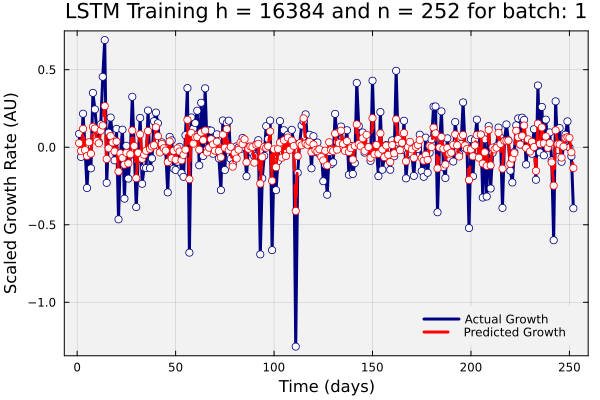

In [261]:
let
    # initialize -
    batchindex = 1; # index of the batch
    y = yₒ[:,:,batchindex]; # get the first batch of training data
    x = xₒ[:,:,batchindex]; # get the first batch of training data
    t = range(1,step=1,stop=number_of_inputs) |> collect; # create a range of numbers from 1 to number_of_training_samples

    # plots -
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); 
    plot!(t, y, label="Actual Growth", lw=3, color=:navy);
    scatter!(t,y, msc=:navy, c=:white, label="")
    plot!(t, trainedmodel(x), label="Predicted Growth", lw=3, color=:red, ls=:dash);
    scatter!(t,trainedmodel(x), c=:white, msc=:red, label="")
    xlabel!("Time (days)");
    ylabel!("Scaled Growth Rate (AU)");
    title!("LSTM Training h = $(number_of_hidden_states) and n = $(number_of_inputs) for batch: $(batchindex)", fontsize=12);
end

#### Training: Visualize the Scaled Excess Growth Rate Distribution
Another way to explore whether the `trained` model captures the data is to look at the distribution predicted by the model. `Unhide` the code block below to see how we plotted the annual excess growth rate distributions for the observed input `signal` data and the `trained` and `untrained` model simulations.
* __Summary__: Following training, the LSTM recapitulates the output distribution to some degree depending upon design and hyperparameter choices.  The `untrained` annual excess growth rate distribution (gray dashed line) is inconsistent with the input `signal` (blue line). However, the `trained` model (red line) _should_ match the observed distribution as we optimize design choices.

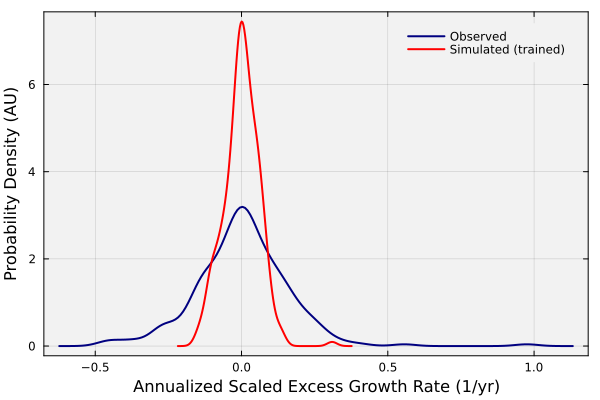

In [291]:
let

    # initialize - 
    batchindex = 2; # index of the batch
    y = yₒ[:,:,batchindex]; # get the first batch of training data
    x = xₒ[:,:,batchindex]; # get the first batch of training data
    ŷ = trainedmodel(x); # get the predicted values
    initial_output = initialprediction[:,:,batchindex];

    density(y, label="Observed", bg="gray95", background_color_outside="white", 
            framestyle = :box, fg_legend = :transparent, lw=2, c=:navy)
    density!(ŷ, normalize=true, c=:red, label="Simulated (trained)", lw=2)
    # density!(initial_output, normalize=true, c=:gray10, label="Simulated (untrained)", lw=2, ls=:dash)
    xlabel!("Annualized Scaled Excess Growth Rate (1/yr)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
end

#### Test: Does the LSTM generalize?
Next, check whether the LSTM will generalize to unseen (test) data. `Unhide` the code block below to see how we plotted the observed (blue) and simulated (red) excess growth rate data from the test dataset.
* __Summary__: The LSTM (given the current training regime) does _not_ generalize to unseen test data. The prediction has too much density around the mean value, and does not describe the tails of the excess growth distribution.

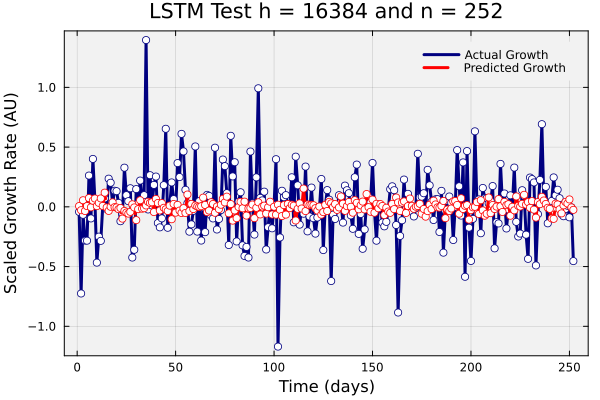

In [265]:
let
    # initialize -
    t = range(1,step=1,stop=number_of_inputs) |> collect; # create a range of numbers from 1 to number_of_training_samples
    x₁ = ones(Float32, (number_of_inputs, 1)).*test[1:number_of_inputs,index_signal]; # create train input
    y₁ = ones(Float32, (number_of_outputs, 1)).*test[1:number_of_outputs,index_target]; # create train output

    # plots -
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); 
    plot!(t, y₁, label="Actual Growth", lw=3, color=:navy);
    scatter!(t,y₁, msc=:navy, c=:white, label="")
    plot!(t, trainedmodel(x₁), label="Predicted Growth", lw=3, color=:red, ls=:dash);
    scatter!(t,trainedmodel(x₁), c=:white, msc=:red, label="")
    xlabel!("Time (days)");
    ylabel!("Scaled Growth Rate (AU)");
    title!("LSTM Test h = $(number_of_hidden_states) and n = $(number_of_inputs)", fontsize=12);
end

__Predicted vs. Observed__: The `trained` model (red line) shows a tighter distribution compared with the input `signal` (blue line). The LSTM (at least with this training regime) does _not_ generalize well.

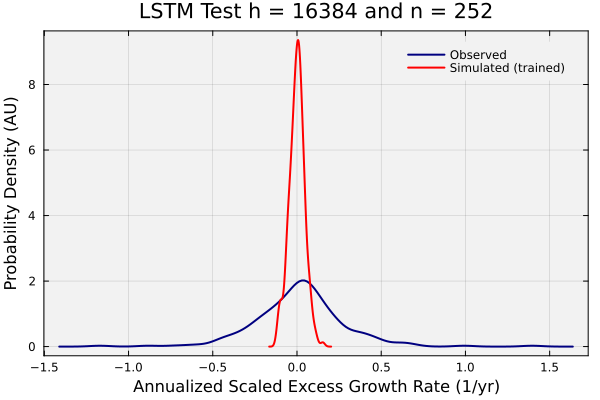

In [267]:
let

    x₁ = ones(Float32, (number_of_inputs, 1)).*test[1:number_of_inputs,index_signal]; # create train input
    y₁ = ones(Float32, (number_of_outputs, 1)).*test[1:number_of_outputs,index_target]; # create train output
    ŷ = trainedmodel(x₁); # get the predicted values

    density(y₁, label="Observed", bg="gray95", background_color_outside="white", 
            framestyle = :box, fg_legend = :transparent, lw=2, c=:navy)
    density!(ŷ, normalize=true, c=:red, label="Simulated (trained)", lw=2)
    xlabel!("Annualized Scaled Excess Growth Rate (1/yr)", fontsize=18)
    ylabel!("Probability Density (AU)", fontsize=18)
    title!("LSTM Test h = $(number_of_hidden_states) and n = $(number_of_inputs)", fontsize=12);
end

## Lab
In Lab `L13b`, we will implement (and _hopefully_ train) a Long Short-Term Memory (LSTM) network constructed using [the `Flux.jl` package](https://github.com/FluxML/Flux.jl) for a natural language task.

# Today?
That's a wrap! What are some of the interesting things we discussed today?